# Warsztaty modelowania w nanofizyce
----
## Ruchy atomów jako funkcja temperatury

**Paweł T. Jochym**

Zakład Komputerowych Badań Materiałów

Instytut Fizyki Jądrowej PAN, Kraków

----
Jak uczy kinetyczna teoria materii temperatura jest jedynie przejawem chaotycznych 
ruchów atomów. Przekonajmy się jak ruchy te zależą od temperatury w której znajduje 
się układ, i czy ta zależność mówi nam coś o zjawiskach w nim zachodzących. Posłużymy się
w tym celu wynikami obliczeń kwantowo-mechanicznych przeprowadzonych na nanocząstce Fe-Pt 
w różnych temperaturach z zakresu 150K-2000K.

Musimy naturalnie zacząć od wczytania trajektorii z pliku danych.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import pickle
from ase import Atoms
from ase import units as un
import ase.io
from IPython.core.display import Image
import numpy as np
from numpy import array, sum, std, mean, sqrt
import gzip

In [2]:
# Wczytanie danych wyliczonych przez program VASP przygotowanych wczesniej
md={}
for k,tr in pickle.load(gzip.open('data/md_PtFePt.p.gz','rb')).items():
    T=int(k.split('/')[-1][1:])
    md[T]=tr
    
print(sorted(md.keys()))

[150, 300, 500, 600, 700, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1350, 1400, 1425, 1450, 1500, 1600, 1700, 2000]


In [3]:
# Miejsce na średnie wychylenie kwadratowe (MSD)
msd=[]
for T in sorted(md.keys()):
    # Lista atomów ma stały porządek w trajektorii
    Fe=array(md[T][1][0].get_chemical_symbols())=='Fe'
    Pt=array(md[T][1][0].get_chemical_symbols())=='Pt'
    
    # Trajektorie atomów Fe i Pt osobno
    trjFe=array([a.get_positions()[Fe] for a in md[T][1]])
    trjPt=array([a.get_positions()[Pt] for a in md[T][1]])
    
    # Normalizacja trajektorii względem średniego położenia atomu
    trjFe=(trjFe-mean(trjFe,axis=0))
    trjPt=(trjPt-mean(trjPt,axis=0))
    
    # Średnie wychylenie kwadratowe atomu
    msd.append([T,
                   mean((sum(trjFe**2,axis=-1)).reshape(-1),axis=0),
                   mean((sum(trjPt**2,axis=-1)).reshape(-1),axis=0)])

# Przekształcenie w macierz dla wygody indeksowania
msd=array(msd).T

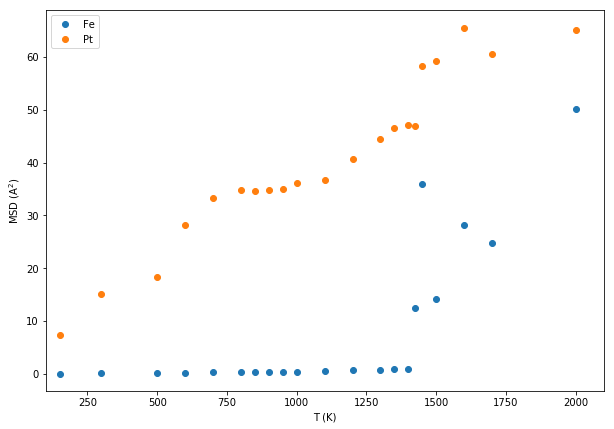

In [5]:
# Narysujmy wyniki
plt.figure(figsize=(10,7))
plt.plot(msd[0],msd[1],'o',label='Fe')
plt.plot(msd[0],msd[2],'o',label='Pt')
plt.xlabel('T (K)')
plt.ylabel('MSD (A$^2$)')
plt.xlim(100,2100)
plt.legend(loc='best');